## **I. Definição do Problema**  
### **1. Contexto Empresarial**  
No setor bancário, a retenção de clientes é um aspecto crítico para manter a lucratividade e o crescimento, especialmente para serviços que dependem do uso recorrente, como cartões de crédito. O conjunto de dados deste projeto representa uma instituição financeira lidando com o aumento da evasão de clientes, o que impacta a receita e a reputação do banco. Prever quais clientes estão em risco de deixar a instituição permite que o banco intervenha com esforços de retenção, como ofertas personalizadas ou melhorias no serviço, para reduzir a rotatividade e fortalecer a lealdade dos clientes.  

### **2. Objetivo do Modelo de ML**  
- Analisar quais fatores afetam a taxa de evasão de clientes do banco.  
- Desenvolver um modelo preditivo que possa identificar com precisão os clientes em potencial risco de deixar os serviços de cartão de crédito, com base nos dados demográficos e transacionais disponíveis.  
- Fornecer insights acionáveis para que o banco reduza a taxa de evasão e melhore seus negócios.  

### **3. Impacto Empresarial**  
- ***Aumento da Receita:*** Reter clientes existentes geralmente é mais econômico do que adquirir novos. Um modelo eficaz de previsão de evasão permite estratégias de retenção direcionadas, que podem manter e aumentar a receita.  
- ***Eficiência Operacional:*** A automação do processo de previsão reduz a carga de trabalho de identificar manualmente clientes em risco.  
- ***Satisfação do Cliente:*** Ao atender proativamente às necessidades específicas dos clientes em risco, o banco pode melhorar a satisfação geral e construir relacionamentos mais sólidos com os clientes.  


## **III. Data Processing**
### **1. Importando bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score

### **2. Carregando o dataset**

In [9]:
bankchurners = pd.read_csv('BankChurners.csv') 
bankchurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
bankchurners.shape

(10127, 23)

In [6]:
bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### **3.Limpeza dos dados**

In [10]:
# removendo colunas desnecessárias
if 'CLIENTNUM' in bankchurners.columns:
    bankchurners.drop(['CLIENTNUM'], axis=1, inplace=True)
bankchurners.drop(columns=[col for col in bankchurners.columns if "Unnamed" in col], inplace=True)

# removendo colunas especificas do Naive Bayes 
bankchurners.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1, inplace=True)

In [12]:
# verificando valores nulos
bankchurners.isnull().sum()


Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
bankchurners['Gender'] = bankchurners['Gender'].map({'M':1,"F":0})
bankchurners['Attrition_Flag'] = bankchurners['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [14]:
bankchurners.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## **IV. Exploratory Data Analysis (EDA)**

In [15]:
bankchurners.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.470919,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


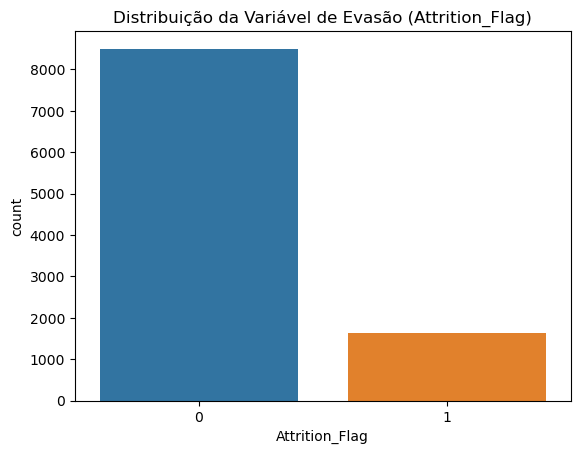

Taxa de Evasão: 16.07%


In [17]:
# Analisar a variável alvo Attrition_Flag (evasão de clientes)
sns.countplot(data=bankchurners, x='Attrition_Flag')
plt.title("Distribuição da Variável de Evasão (Attrition_Flag)")
plt.show()

# Calcular a taxa de evasão
churn_rate = bankchurners['Attrition_Flag'].mean() * 100
print(f"Taxa de Evasão: {churn_rate:.2f}%")



Attrition_Flag (valor alvo): Há um claro desequilíbrio de classes, com uma diferença significativa entre o número de clientes atuais e desligados. Como os clientes que se desviam representam apenas cerca de 16% do conjunto de dados, lidar com esse desequilíbrio será crucial para garantir previsões precisas.

### ***2. Distribuição das variáveis independentes***

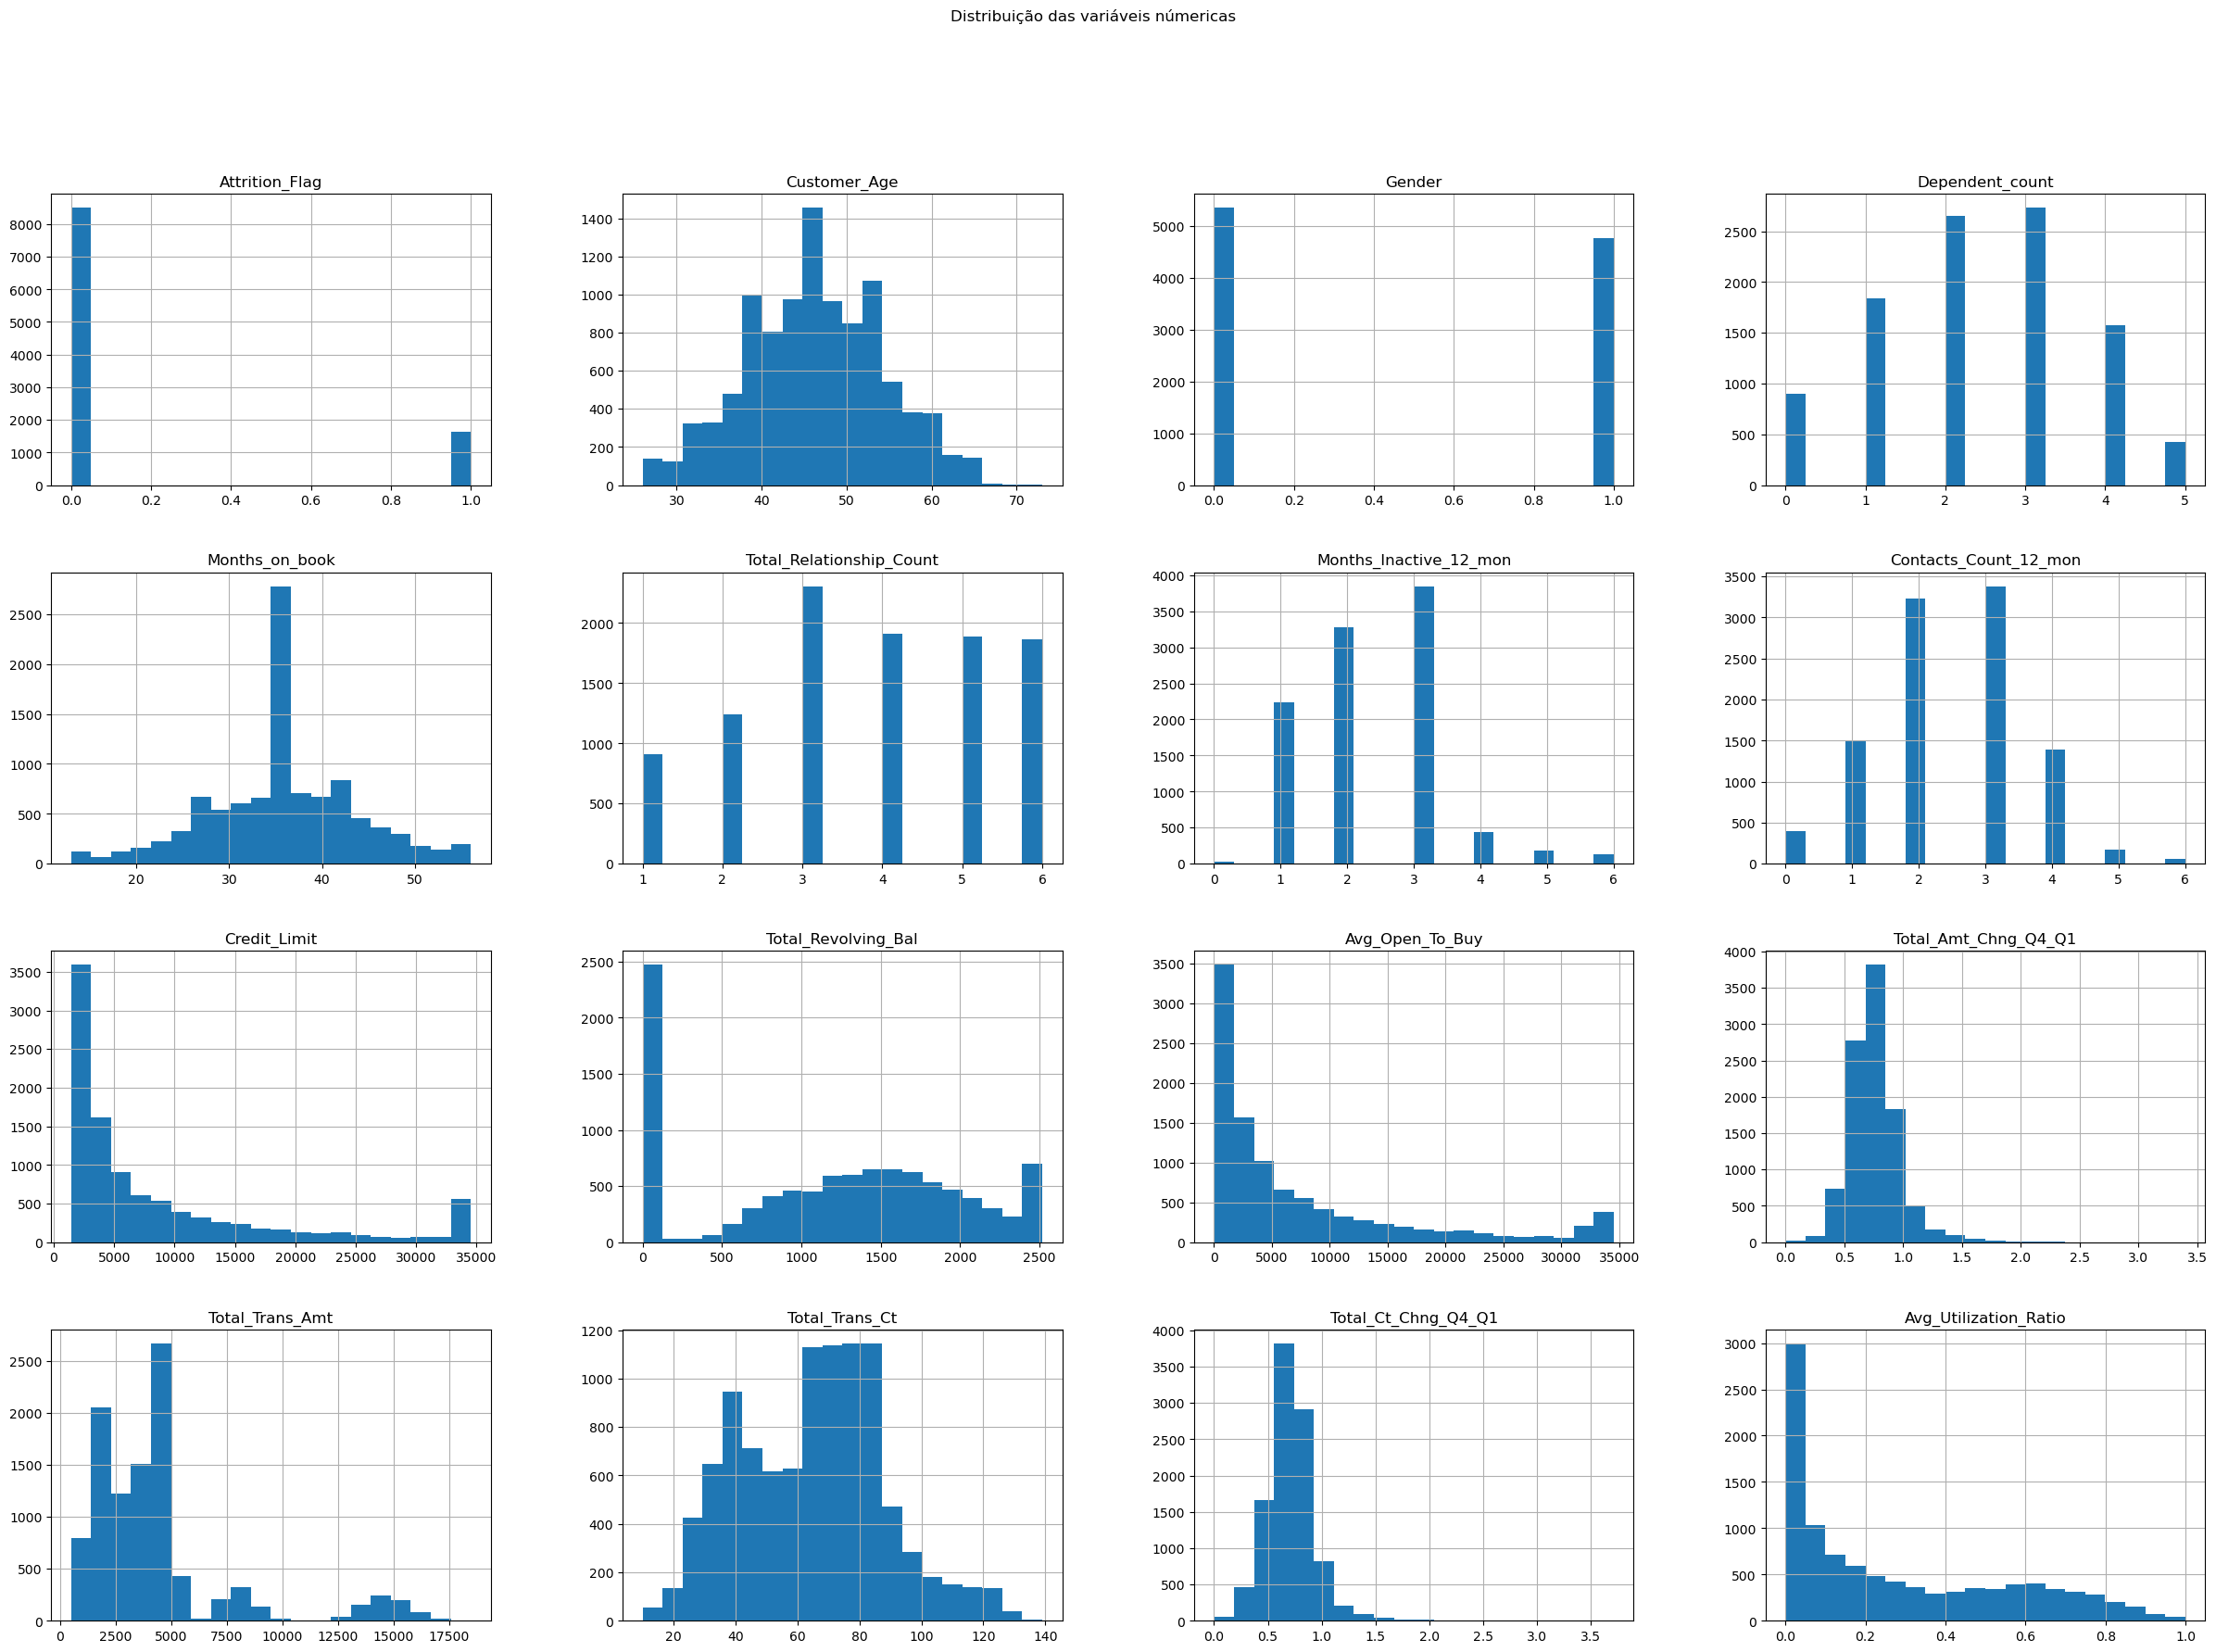

In [18]:
bankchurners.hist(bins=20, figsize=(30, 20))
plt.suptitle("Distribuição das variáveis númericas")
plt.show()

**Principais Descobertas:**

- **Customer_Age (Idade do Cliente):** A distribuição etária é próxima de uma normal, centrada ***entre 40 e 55 anos***, indicando uma ***base de clientes de meia-idade***. Esse grupo etário pode ter motivações de evasão diferentes em comparação com clientes mais jovens ou mais velhos, o que pode fornecer insights para estratégias de retenção.

- **Months_on_book (Meses como Cliente):** A maioria dos clientes está com o banco há ***30–40 meses***. Isso pode indicar uma "janela de risco de evasão" que ocorre nesse período, o que justifica uma análise mais aprofundada para verificar se um tempo maior de permanência impacta a probabilidade de evasão.

- **Credit_Limit (Limite de Crédito) e Total_Trans_Amt (Total de Transações):** Ambas as distribuições são ***assimétricas à direita***, com um pequeno subconjunto de clientes possuindo limites de crédito e valores de transação muito altos. Esses clientes de alto gasto podem ter comportamentos ou níveis de lealdade diferentes, o que pode afetar sua probabilidade de evasão.

- **Contacts_Count_12_mon (Número de Contatos em 12 Meses) e Months_Inactive_12_mon (Meses Inativos nos Últimos 12 Meses):** A maioria dos clientes teve ***1–2 meses inativos*** e ***2–4 contatos com o banco*** nos últimos 12 meses. Baixo engajamento ou contato infrequente pode ser um indicador potencial de evasão, pois esses clientes podem estar menos envolvidos com os serviços do banco.


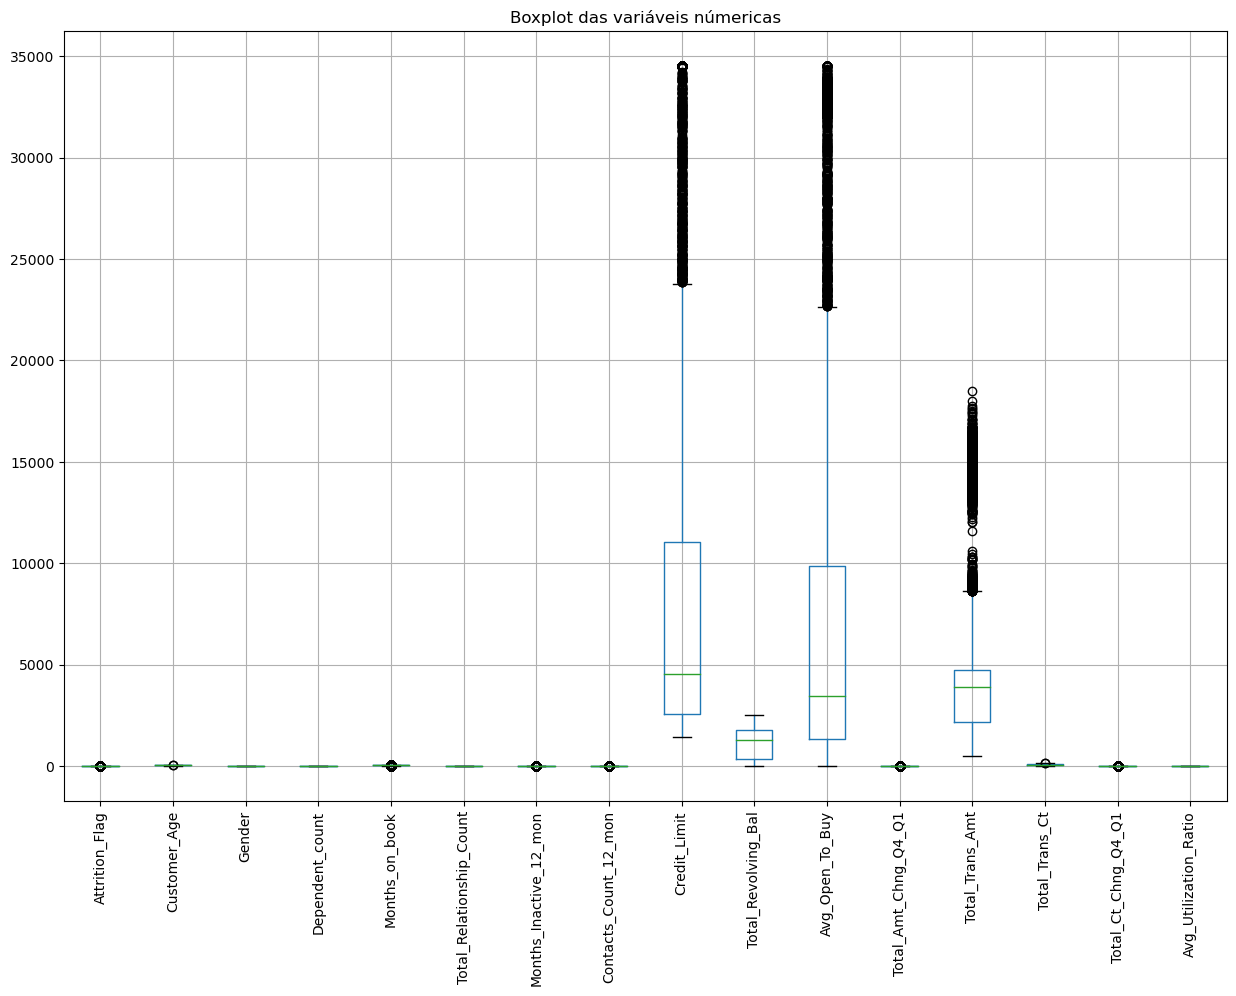

In [20]:
numeric_cols = bankchurners.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
bankchurners[numeric_cols].boxplot()
plt.title("Boxplot das variáveis númericas")
plt.xticks(rotation=90)
plt.show()

- **Credit_Limit (Limite de Crédito), Total_Revolving_Bal (Saldo Rotativo Total), Avg_Open_To_Buy (Média Disponível para Compras) e Total_Trans_Amt (Total de Transações):** Essas variáveis apresentam um ***grande número de valores discrepantes de alto valor***, que podem representar um subconjunto de clientes com perfis financeiros únicos (por exemplo, clientes de alto valor). Esses clientes podem se comportar de maneira diferente em termos de lealdade e padrões de evasão.

> Todos esses atributos representam os comportamentos de transação dos clientes. Partindo da suposição de que clientes com um maior número de transações, assim como um maior valor transacionado, terão um maior engajamento com o banco e, consequentemente, uma menor taxa de evasão, parece que remover esses "outliers" reduziria a capacidade do modelo de diferenciar entre clientes engajados (baixa evasão) e desengajados (alta evasão).

> Portanto, para este conjunto de dados, em vez de remover os outliers diretamente, pode ser mais benéfico: normalizar/padronizar ou aplicar uma transformação logarítmica em certas variáveis para reduzir o impacto de distribuições assimétricas, ou utilizar modelos robustos (por exemplo, métodos baseados em árvores como Random Forest) que são menos sensíveis


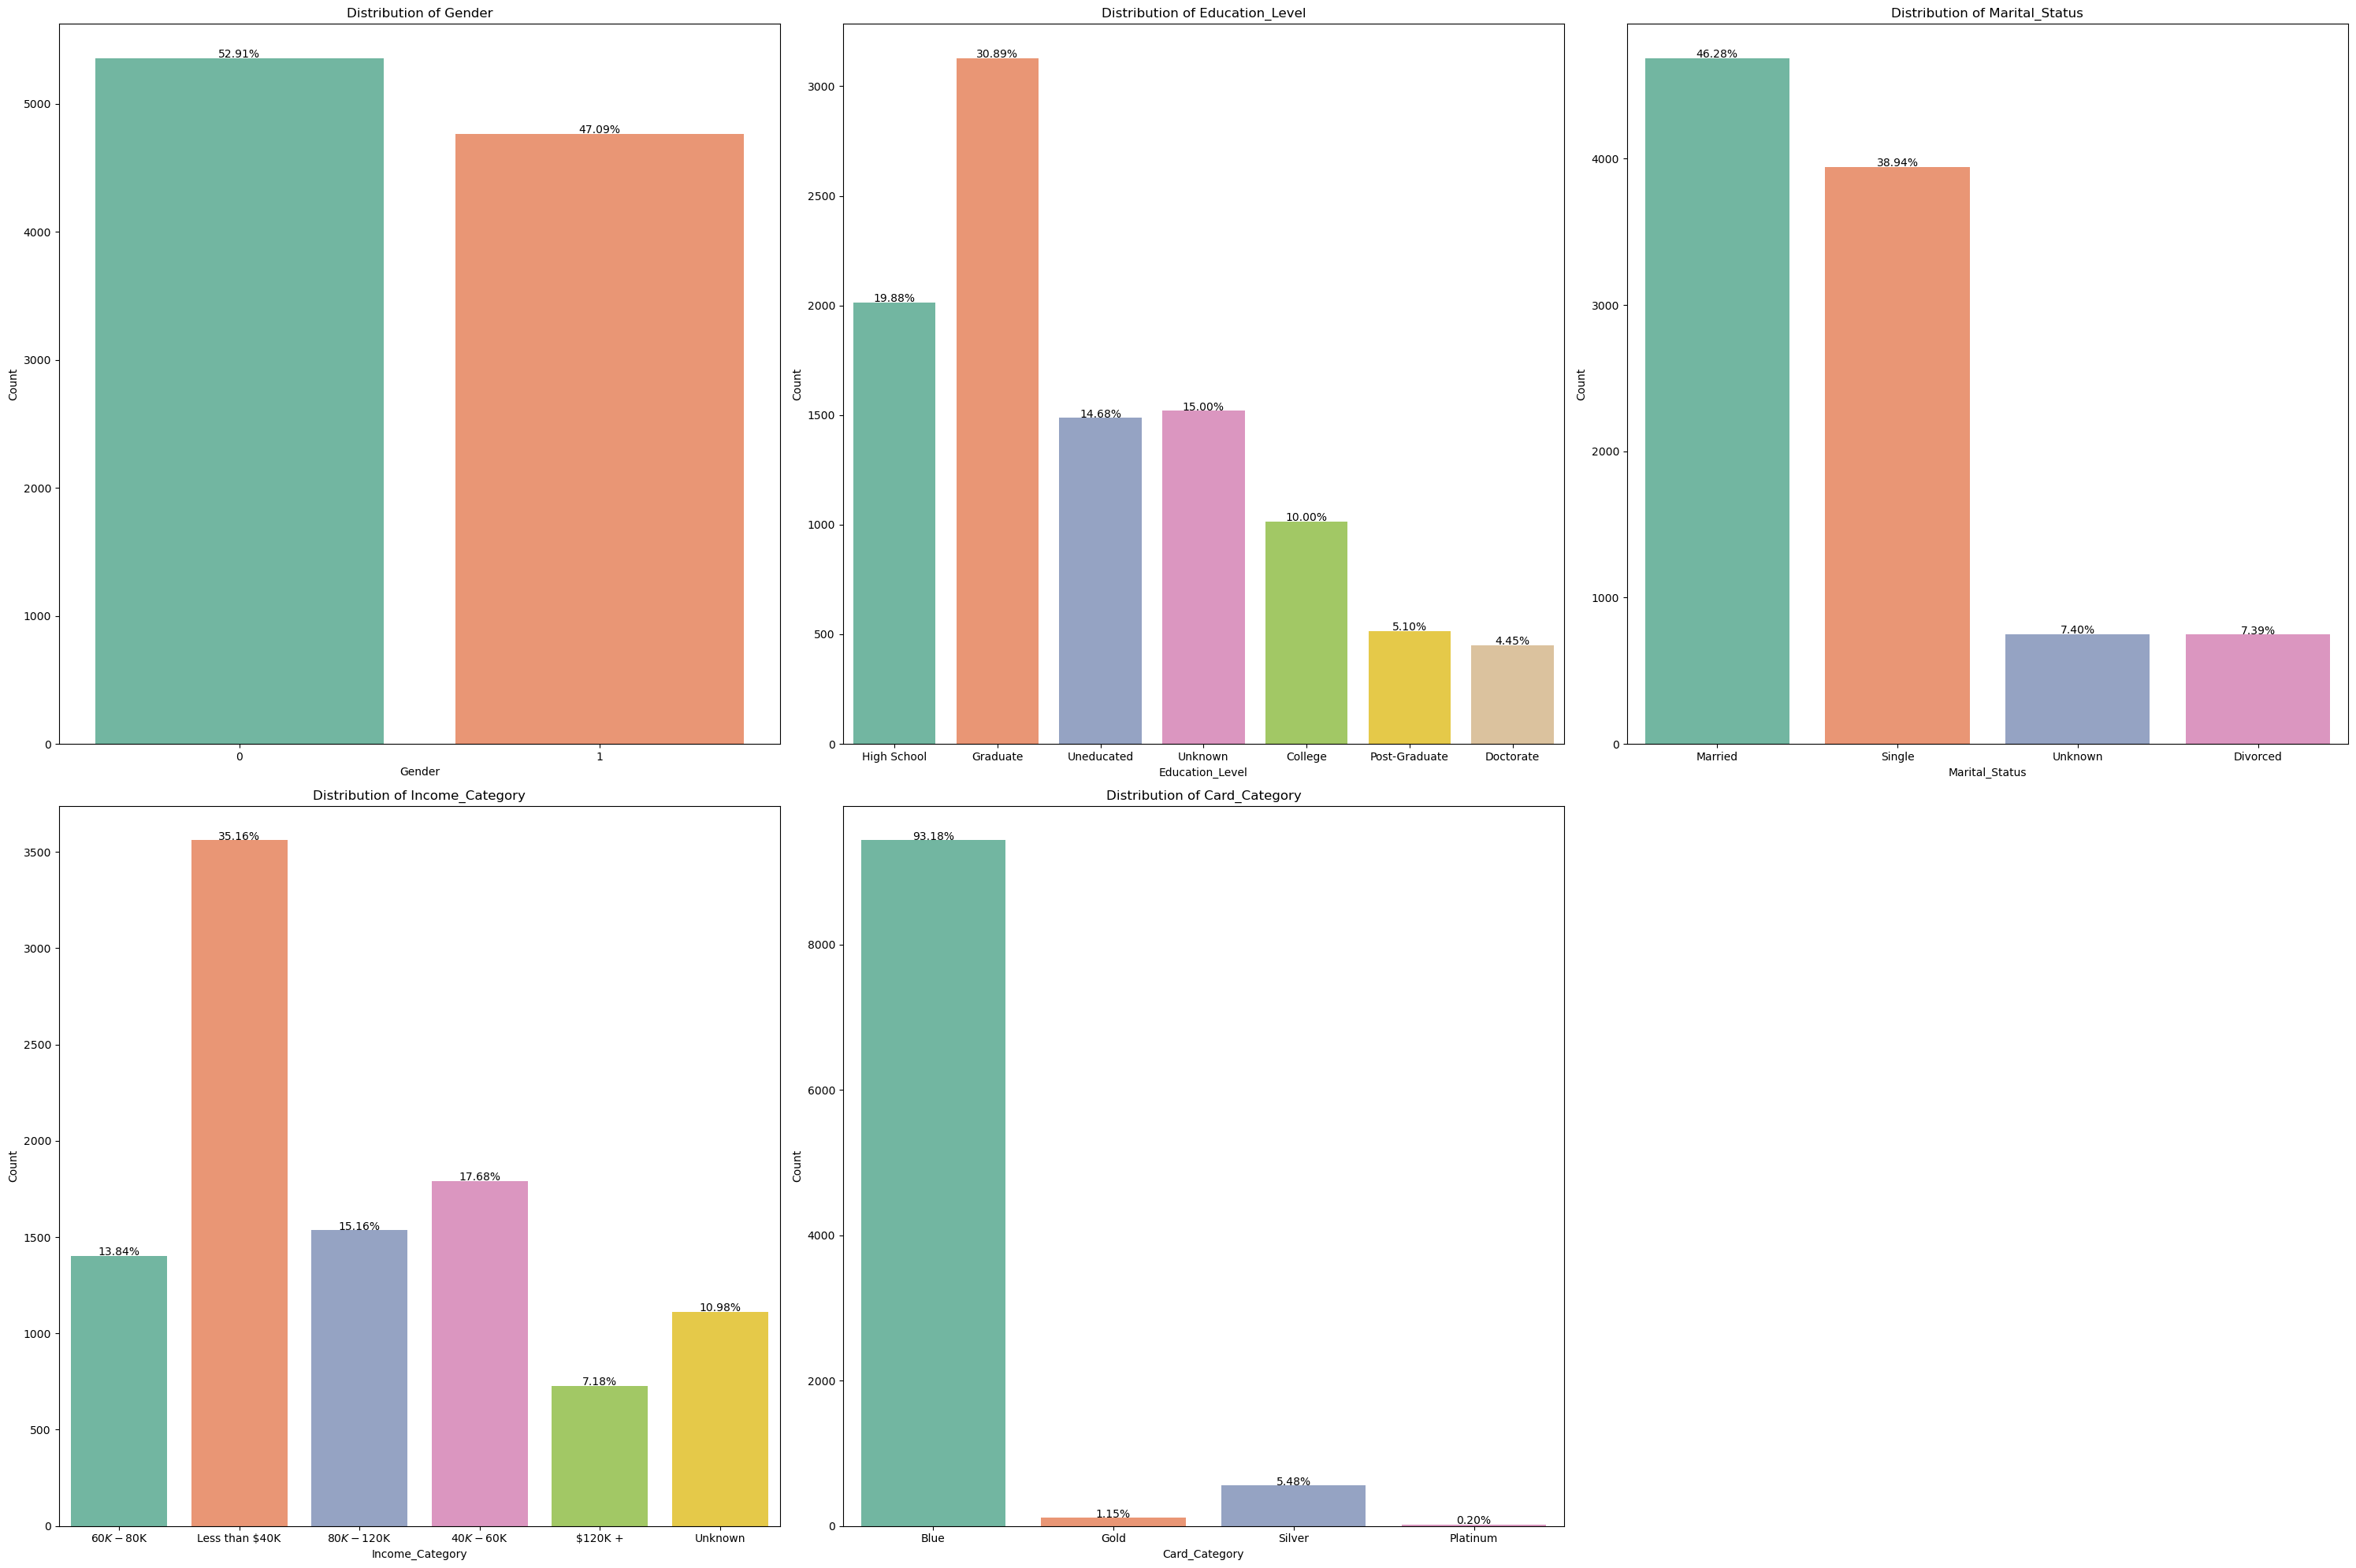

In [21]:
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

plt.figure(figsize=(30, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)   
    sns.countplot(x=column, data=bankchurners, palette='Set2')
    total = len(bankchurners[column])
    for p in plt.gca().patches:
        height = p.get_height()
        percentage = (height / total) * 100
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.2f}%', ha='center')

    plt.title(f'Distribution of {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Customer_Age', ylabel='Count'>

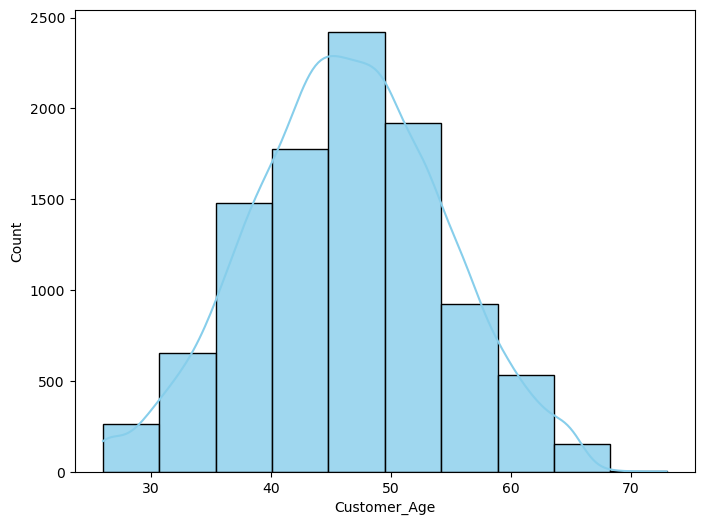

In [51]:
plt.figure(figsize=(8, 6))
snb.histplot(df['Customer_Age'], kde=True, color='skyblue', bins=10, alpha=0.8)

In [52]:

education_order = {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 
                   'Post-Graduate': 4, 'Doctorate': 5, 'Unknown': -1}

df['Education_Level'] = df['Education_Level'].map(education_order)



In [53]:

income_order = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Unknown': -1
}

df['Income_Category'] = df['Income_Category'].map(income_order)



In [54]:
df = pd.get_dummies(df, columns=['Marital_Status', 'Card_Category','Gender'],sparse=True,drop_first=True)

In [55]:
correlation_matrix = df.corr()


/tmp/ipykernel_25491/3450543936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


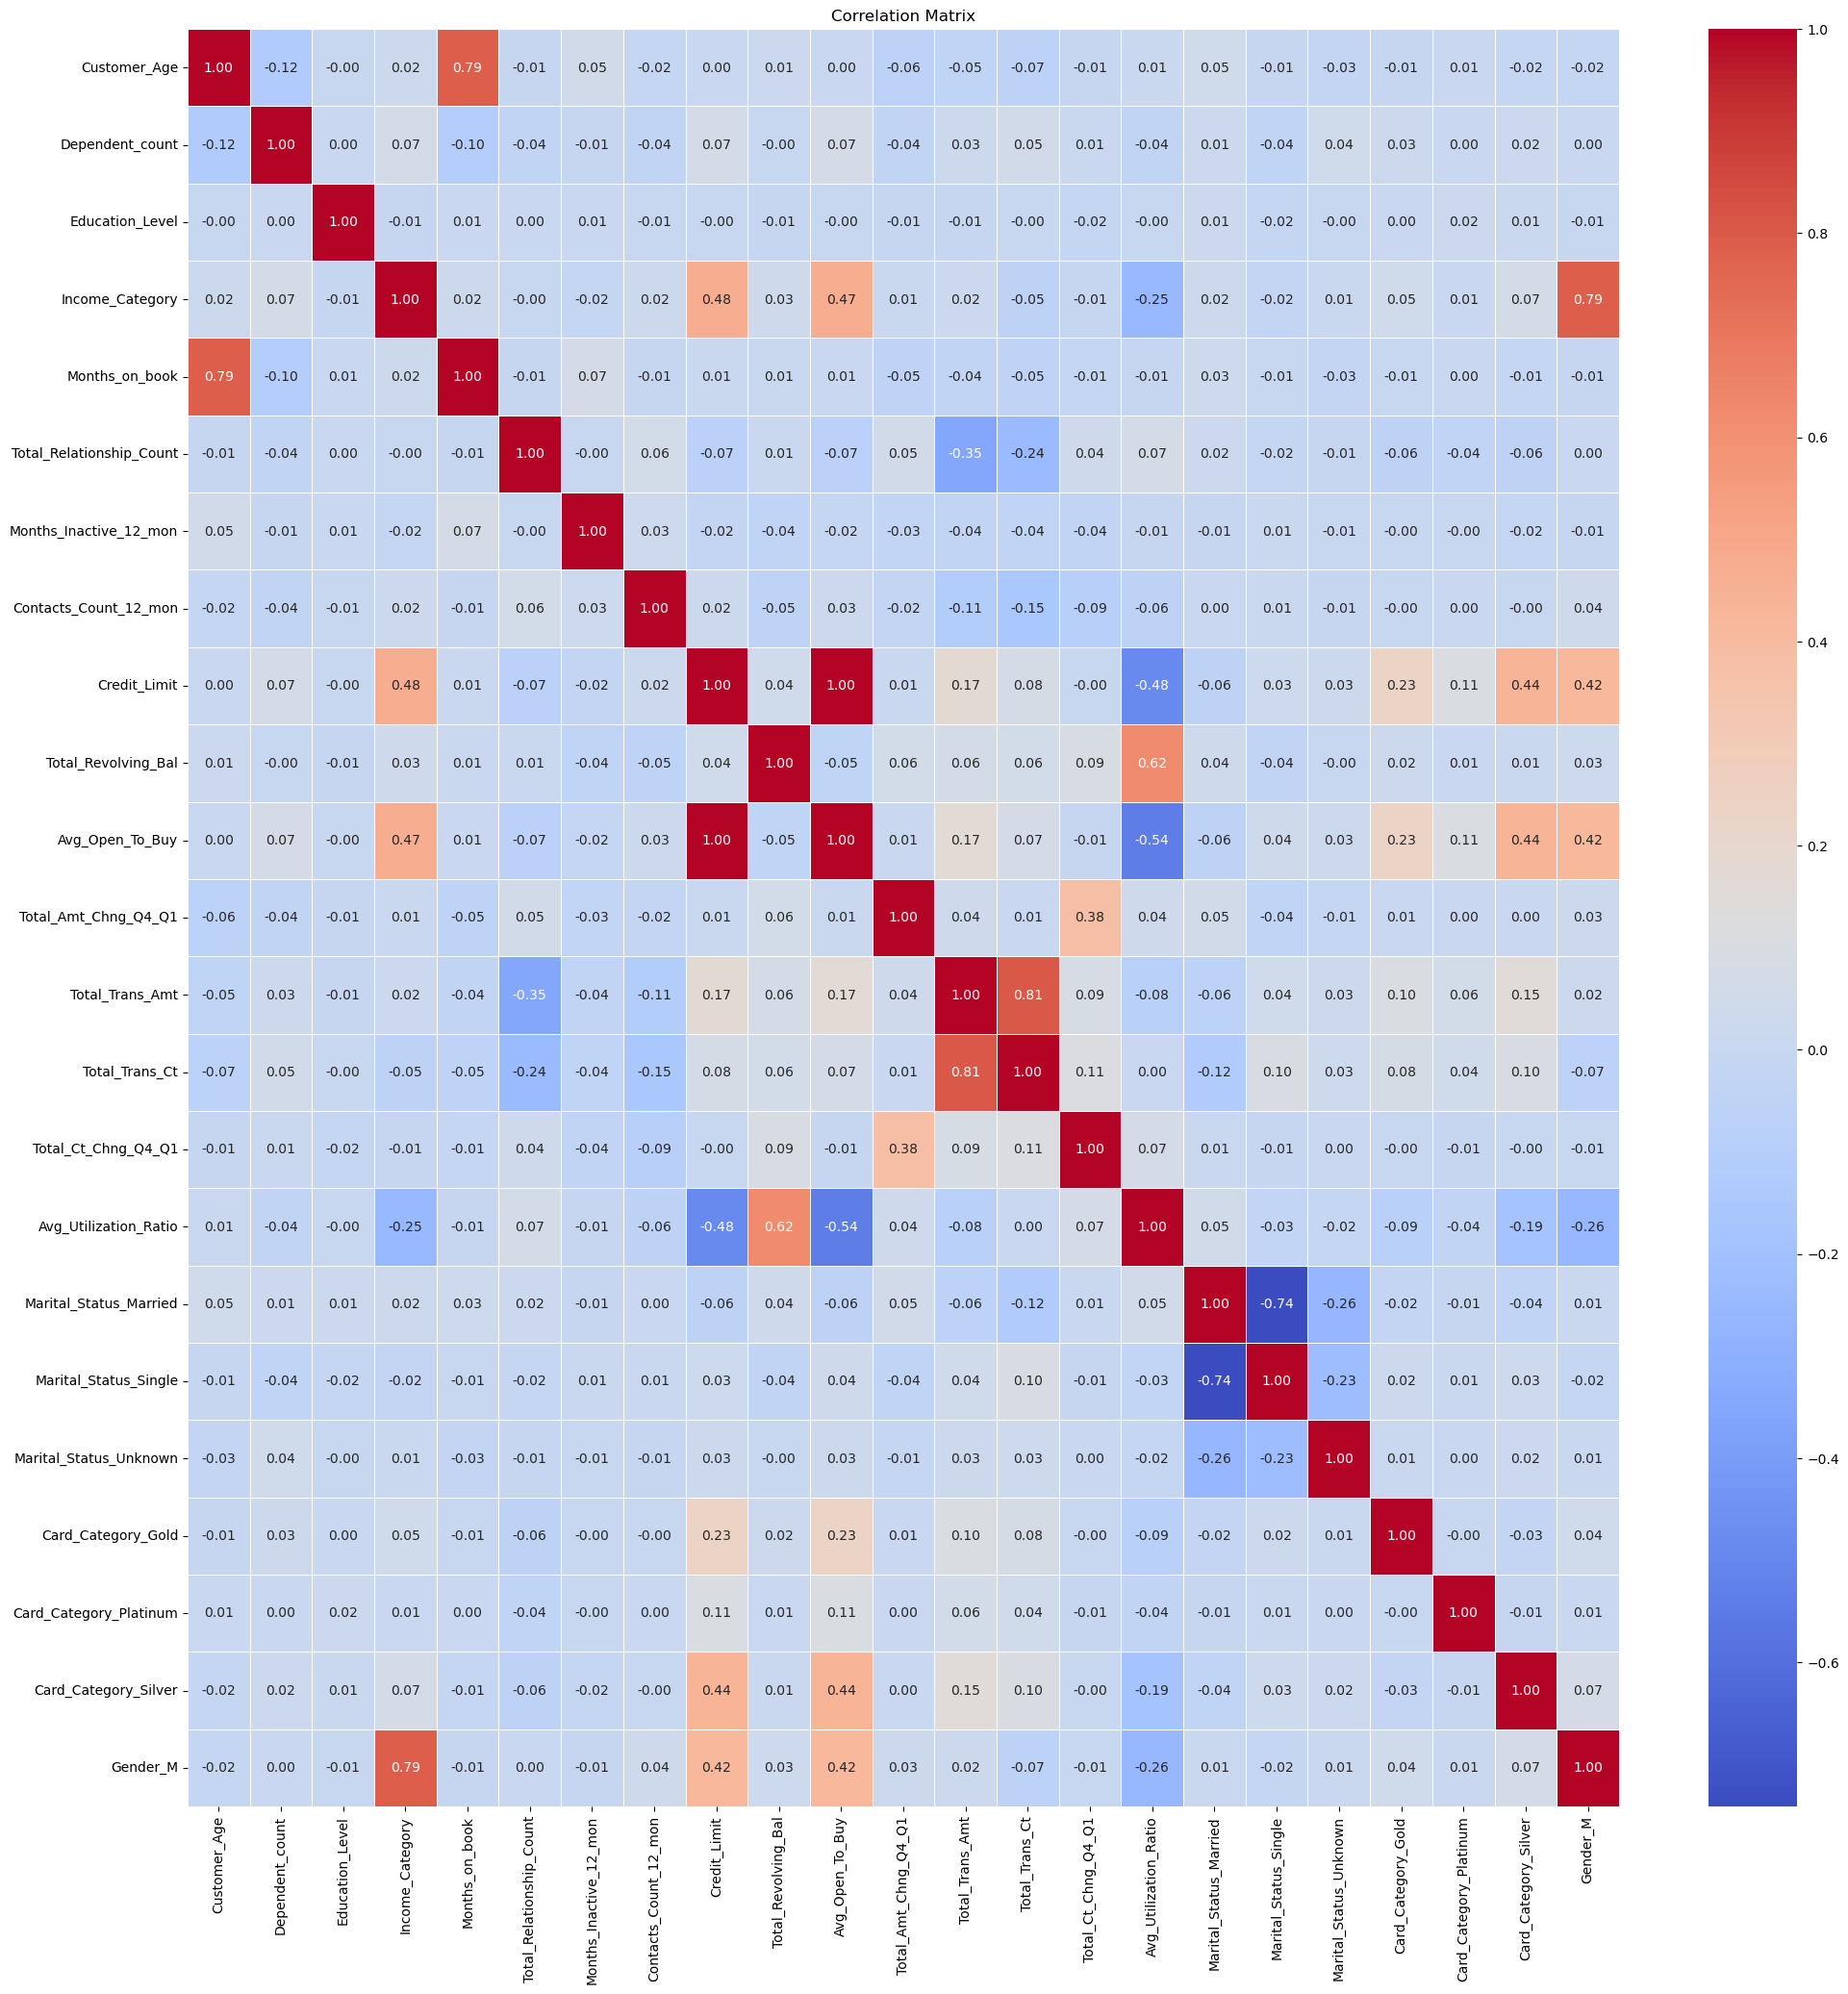

In [56]:
plt.figure(figsize=(24, 24))
snb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [58]:
X=df.drop(columns='Attrition_Flag')
y=df['Attrition_Flag']



In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
req_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']

In [61]:

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[req_cols])
X_test = scaler.transform(X_test[req_cols])

In [63]:
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

Accuracy: 0.9600197433366239

Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.87      0.89      0.88       327
Existing Customer       0.98      0.97      0.98      1699

         accuracy                           0.96      2026
        macro avg       0.92      0.93      0.93      2026
     weighted avg       0.96      0.96      0.96      2026


Confusion Matrix:
[[ 290   37]
 [  44 1655]]


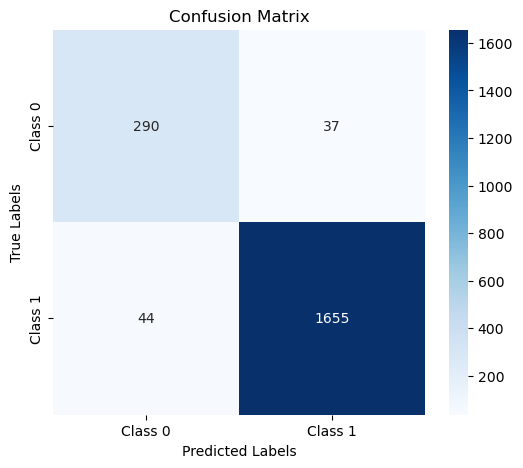

In [66]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=69, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred1 = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
snb.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()